In [15]:
# เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [48]:
# อ่านข้อมูลไฟล์ csv จาก https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/DataSet/DataChange.csv
# และเเสดง 5 ตัวอย่างเเรก เพื่อตรวจสอบข้อมูล
url='https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/DataSet/CombDataSet.csv'
df=pd.read_csv(url)
df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.015047,0.000000,0.005260,0.000000,0.003284,0.002718,0.000000,0.012819,0.007649,D
1,0.000000,0.014676,0.009085,0.014188,0.009852,0.002718,0.012093,0.009614,0.007649,A
2,0.000000,0.014676,0.016018,0.014188,0.009852,0.002718,0.000000,0.003205,0.012749,B
3,0.015047,0.014676,0.016018,0.014188,0.016421,0.000000,0.024186,0.006410,0.012749,B
4,0.000000,0.014676,0.009563,0.014188,0.006568,0.002718,0.024186,0.019229,0.012749,A


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   float64
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   float64
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   float64
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   float64
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   float64
 9   Segmentation     8068 non-null   object 
dtypes: float64(9), object(1)
memory usage: 630.4+ KB


In [58]:
df.Segmentation.value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [59]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [60]:
df.groupby('Segmentation').mean()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Segmentation,,,,,,,,,
A,0.008111,0.008462,0.010740,0.008770,0.008813,0.007312,0.005427,0.008522,0.010385
B,0.008074,0.010647,0.011523,0.010171,0.007654,0.006077,0.008839,0.008962,0.010582
C,0.008004,0.011539,0.011749,0.011573,0.005895,0.005825,0.010515,0.009821,0.011171
D,0.008684,0.003941,0.007983,0.005067,0.009068,0.007516,0.002399,0.011174,0.010045


In [61]:
df.groupby('Segmentation').max()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Segmentation,,,,,,,,,
A,0.015047,0.014676,0.021277,0.014188,0.026273,0.038054,0.024186,0.028843,0.015299
B,0.015047,0.014676,0.021277,0.014188,0.026273,0.038054,0.024186,0.028843,0.015299
C,0.015047,0.014676,0.021277,0.014188,0.026273,0.038054,0.024186,0.028843,0.015299
D,0.015047,0.014676,0.021277,0.014188,0.026273,0.038054,0.024186,0.028843,0.015299


In [62]:
df.groupby('Segmentation').min()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Segmentation,,,,,,,,,
A,0.0,0.0,0.004303,0.0,0.0,0.0,0.0,0.003205,0.0
B,0.0,0.0,0.004303,0.0,0.0,0.0,0.0,0.003205,0.0
C,0.0,0.0,0.004303,0.0,0.0,0.0,0.0,0.003205,0.0
D,0.0,0.0,0.004303,0.0,0.0,0.0,0.0,0.003205,0.0


In [55]:
Vals=['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']

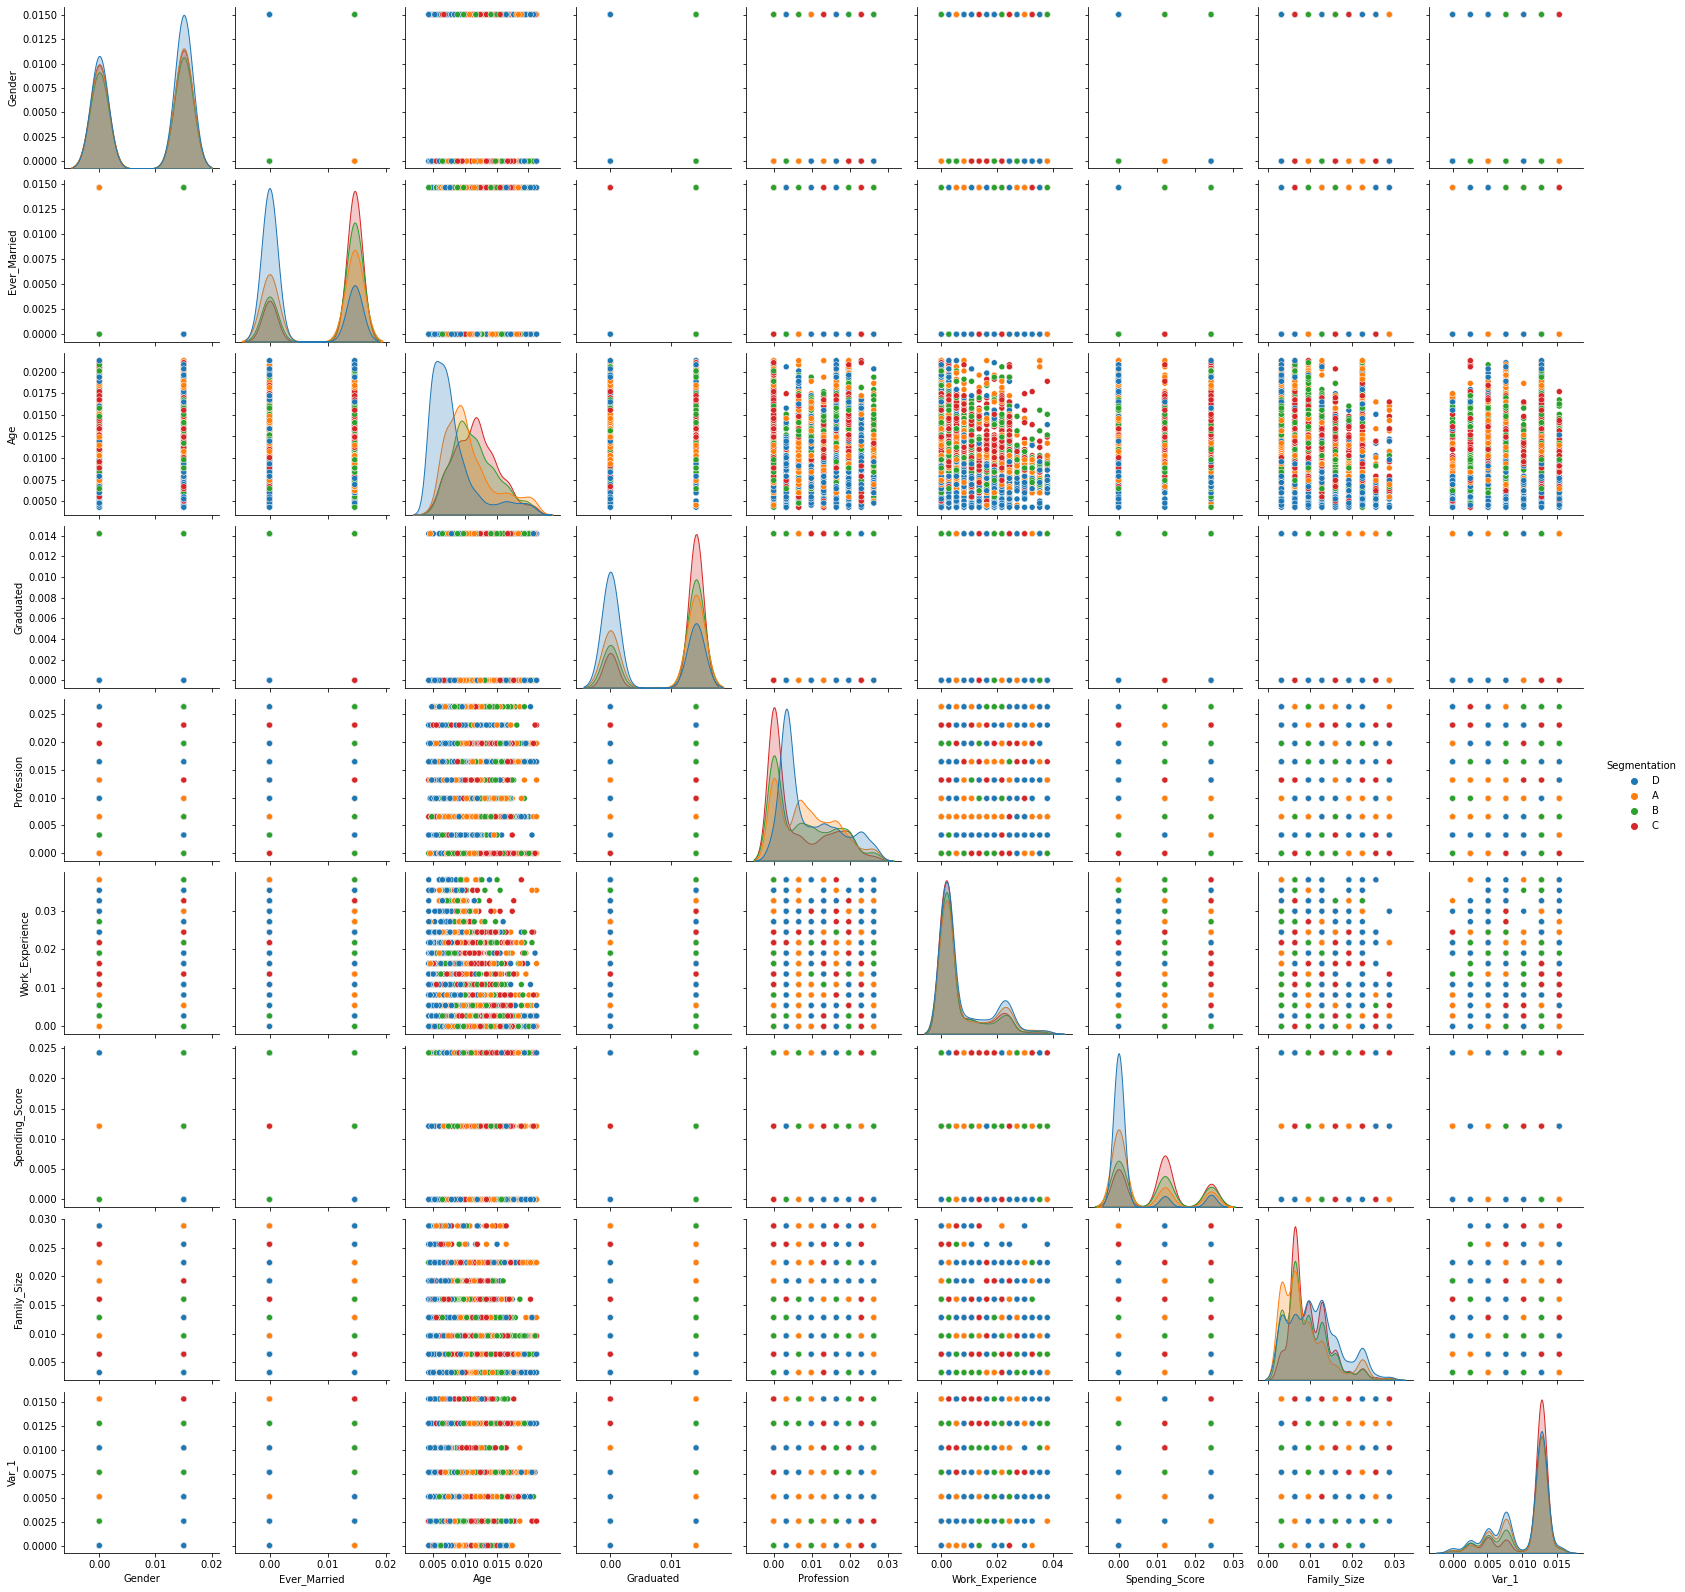

In [56]:
sns.pairplot(data=df,hue='Segmentation');

In [173]:
# จัดกลุ่มข้อมูล (Classification) ด้วยวิธี K-Nearest Neighbours โดยใช้ library ของ scikit learn
# นำเข้าคลาสของ KNeighborsClassifier StandardScaler เเละ train_test_split จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # ปรับช่วงข้อมูลด้วยวิธี standardization

In [269]:
test_size=0.25
x_train, x_test, y_train, y_test = train_test_split(
    df[['Age','Spending_Score','Profession','Var_1']], 
    df.Segmentation, 
    test_size=test_size, random_state=7)

In [270]:
y_train.head()

3534    C
2583    D
2086    D
2584    B
2271    A
Name: Segmentation, dtype: object

In [271]:
x_train.head()

,Age,Spending_Score,Profession,Var_1
3534,0.011954,0.012093,0.000000,0.012749
2583,0.004303,0.000000,0.000000,0.007649
2086,0.007411,0.000000,0.006568,0.007649
2584,0.020082,0.024186,0.016421,0.012749
2271,0.014344,0.000000,0.000000,0.007649


In [277]:
prefer_k = 100  # สร้างตัวเเปรสำหรับเก็บ k ที่ต้องการ
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

KNeighborsClassifier(n_neighbors=100)

In [278]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [279]:
model.score(x_train, y_train)

0.5176003966286564

In [280]:
model.score(x_test, y_test)

0.49082796232027764

In [276]:
from sklearn.model_selection import cross_val_score 

In [268]:
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
scores

array([0.50619323, 0.49008264, 0.49173554, 0.48016529, 0.50743802])

In [183]:
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.511 (0.010)


In [184]:
predicted = model.predict(x_test)

In [185]:
from sklearn import metrics
print(metrics.classification_report(y_test,predicted,target_names=df.Segmentation.unique(), digits=3))

              precision    recall  f1-score   support

           D      0.391     0.450     0.419       471
           A      0.340     0.251     0.288       479
           B      0.557     0.513     0.534       534
           C      0.600     0.709     0.650       533

    accuracy                          0.488      2017
   macro avg      0.472     0.481     0.473      2017
weighted avg      0.478     0.488     0.479      2017



In [186]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')

In [187]:
grid.fit(df[['Age','Spending_Score','Profession','Var_1']], df.Segmentation)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=77),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [188]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020628,0.008965,0.078120,0.009882,1,{'n_neighbors': 1},0.423172,0.373606,0.408302,0.438934,0.398016,0.408406,0.022222,69
1,0.020623,0.006432,0.085065,0.013542,2,{'n_neighbors': 2},0.387237,0.364312,0.407063,0.407316,0.415375,0.396261,0.018474,70
2,0.021875,0.007654,0.075085,0.006299,3,{'n_neighbors': 3},0.449195,0.403346,0.455390,0.452573,0.461252,0.444351,0.020881,68
3,0.015625,0.000001,0.078118,0.009882,4,{'n_neighbors': 4},0.436183,0.432466,0.453532,0.446373,0.471792,0.448069,0.014001,67
4,0.016211,0.008282,0.075560,0.010390,5,{'n_neighbors': 5},0.464064,0.428129,0.451673,0.453813,0.468072,0.453150,0.013932,66


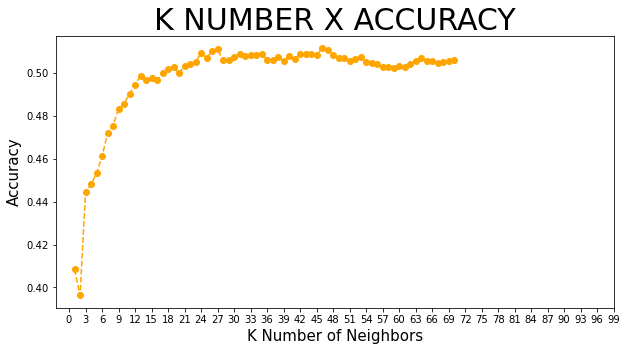

In [189]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,100,3),)
plt.show()

In [190]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 46} with 0.5115273901409781 of accuracy.


In [191]:
prefer_k = 46  # สร้างตัวเเปรสำหรับเก็บ k ที่ต้องการ
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

KNeighborsClassifier(n_neighbors=46)

In [192]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=46)

In [193]:
model.score(x_train, y_train)

0.5377623533300281

In [194]:
model.score(x_test, y_test)

0.5007436787307883